In [1]:
import sys


sys.path.append("../code/")
from matrix_factorisation import nmf_features, transform, transform_2, preprocess, get_static_features
import  os

In [2]:
import  os

import numpy as np
import pandas as pd
import pickle
from subprocess import Popen
sys.path.append("../../code")
from features import feature_map
import subprocess

def _save_results(appliance, lat, feature_comb, test_home, pred_df):
    pred_df.to_csv(os.path.expanduser("~/collab_subset/%s_%d_%s_%d.csv" %(appliance, lat, '_'.join(feature_comb), test_home)))

out_overall = pickle.load(open('../../data/input/all_regions.pkl', 'r'))

In [3]:
%matplotlib inline

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def create_region_df(region):

    df = out_overall[region]

    df_copy = df.copy()
    #drop_rows_having_no_data
    o = {}
    for h in df.index:
        o[h]=len(df.ix[h][feature_map['Monthly']].dropna())
    num_features_ser = pd.Series(o)
    drop_rows = num_features_ser[num_features_ser==0].index

    df = df.drop(drop_rows)
    dfc = df.copy()


    df = df.rename(columns={'house_num_rooms':'num_rooms',
                            'num_occupants':'total_occupants',
                            'difference_ratio_min_max':'ratio_difference_min_max'})
    return df, dfc

In [7]:
aus_df, aus_dfc = create_region_df("Austin")
sd_df, sd_dfc = create_region_df("SanDiego")

In [8]:
aus_df.describe()

/home/nipun/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,md_available,full_agg_available,ratio_min_max,ratio_difference_min_max,variance,skew,kurtosis,p_25,p_50,p_75
count,413.000000,409.000000,412.000000,413.000000,407.000000,394.000000,367.000000,362.000000,356.000000,350.000000,...,509.000000,509.000000,308.000000,308.000000,3.080000e+02,308.000000,308.000000,308.000000,308.000000,308.000000
mean,49.960085,39.496105,47.891970,117.295059,203.166290,397.419705,620.989640,686.541115,481.519331,241.089819,...,0.267191,0.605108,0.321309,0.321309,1.761120e+05,0.676967,-0.449430,683.292817,865.839990,1235.429694
std,145.243015,105.512343,78.023822,110.509024,153.641974,262.575486,344.918810,367.110462,262.788653,155.562322,...,0.442928,0.489308,0.109082,0.109082,1.679657e+05,0.487553,1.061878,418.000180,493.873163,611.366181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001717,0.000883,0.003433,0.004250,0.000000,...,0.000000,0.000000,0.000774,0.000774,7.920383e+03,-2.620439,-1.946933,151.604664,195.780441,271.021820
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1032.923218,768.023865,715.312134,934.861694,1258.950684,1609.004517,2130.617920,1834.047852,1386.018921,876.380493,...,1.000000,1.000000,0.602784,0.602784,1.294741e+06,2.037984,8.027035,3648.723206,4120.627197,4806.598511


In [9]:
sd_df.describe()

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,md_available,full_agg_available,ratio_min_max,ratio_difference_min_max,variance,skew,kurtosis,p_25,p_50,p_75
count,25.000000,21.000000,21.000000,21.000000,21.000000,21.000000,19.000000,18.000000,17.000000,16.000000,...,25.000000,25.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.872984,9.612234,41.898885,16.089301,11.544653,54.993461,139.051996,200.787931,218.475030,100.481623,...,0.320000,0.6,0.360055,0.360055,26990.701874,0.966625,0.821350,288.475466,338.734162,455.786605
std,6.086553,18.664510,54.565867,25.867798,14.615083,75.051578,131.126788,154.895570,154.455217,91.316928,...,0.476095,0.5,0.160957,0.160957,27312.332351,0.794648,2.665175,141.916068,172.049184,244.128478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001750,2.942883,10.533083,0.000000,...,0.000000,0.0,0.009267,0.009267,888.054279,-0.078278,-2.083153,146.753063,149.083908,163.073223
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.004050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.029083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,29.184666,52.655632,224.037476,105.825180,54.593281,266.363251,392.775696,537.882385,548.815247,326.567413,...,1.000000,1.0,0.580463,0.580463,93571.358317,2.402325,7.170091,601.410309,726.297211,979.907196


In [22]:
sd_df['temp']=

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,md_available,full_agg_available,ratio_min_max,ratio_difference_min_max,variance,skew,kurtosis,p_25,p_50,p_75
203,0.002000,0.002700,29.053850,19.651184,15.861900,68.252647,145.872055,173.272644,203.351685,72.101601,...,0,1,0.352858,0.352858,11444.769891,0.990983,-0.052504,241.198689,268.654037,351.088257
1450,1.563983,49.754932,224.037476,105.825180,54.593281,266.363251,365.305908,497.618652,548.815247,326.567413,...,0,1,0.414237,0.414237,56334.856003,0.276487,-1.620418,601.410309,726.297211,979.907196
1524,0.025400,0.027333,16.035267,4.751067,14.896517,185.289536,218.260483,325.225800,331.544067,159.814423,...,0,1,0.323581,0.323581,29697.892286,0.737280,-0.923025,257.036800,330.575531,507.019714
1731,0.197017,0.000000,21.463934,12.613634,7.330667,40.226986,221.842163,286.762146,295.495148,175.822769,...,1,1,0.360746,0.360746,39154.448822,0.087290,-2.083153,329.804420,490.044968,692.856308
2354,0.000517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2606,4.041283,48.951168,114.115364,32.597801,30.465033,118.778206,213.009796,302.353729,358.428986,233.708633,...,1,1,0.440386,0.440386,29220.154500,0.648063,-0.327643,536.360283,607.543243,779.882858
3687,0.000000,0.000000,29.437967,0.000000,0.000000,69.320015,183.210800,273.997559,13.414872,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3864,0.017150,0.020400,40.932602,8.901500,14.734150,17.263117,101.148369,193.589783,318.287964,55.308468,...,0,1,0.063724,0.063724,22039.615570,1.347794,2.552081,181.659874,222.681030,289.520897
3938,0.004050,0.003250,0.002283,0.002750,0.003533,4.694933,36.938816,64.682098,67.889999,42.861000,...,0,1,0.555696,0.555696,1655.007347,0.162022,-1.587008,163.901379,198.883507,233.278088
4495,0.029083,0.020650,0.011833,0.014550,0.014050,0.016583,0.006450,2.942883,20.143316,17.803518,...,0,1,0.580463,0.580463,1069.470137,0.026752,-1.406992,152.239399,171.471230,201.696285


In [10]:
df = pd.concat([sd_df, aus_df])
dfc = pd.concat([sd_dfc, aus_dfc])

In [11]:
appliance, test_home, ALL_HOMES = "fridge",9938, False

In [12]:
from all_functions import *
from features_larger import *

import itertools
feature_combinations = [['None']]
for l in range(1,4):
    for a in itertools.combinations(['occ','area','rooms'], l):
        feature_combinations.append(list(a))

import time

In [13]:
out = {}

if appliance=="hvac":
    start, end = 5,11
else:
    start, end=1,13
X_matrix, X_normalised, col_max, col_min, appliance_cols, aggregate_cols = preprocess(df, dfc, appliance)
static_features= get_static_features(dfc, X_normalised)

In [14]:
X_matrix.head()

,fridge_1,fridge_2,fridge_3,fridge_4,fridge_5,fridge_6,fridge_7,fridge_8,fridge_9,fridge_10,...,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
203,27.911800,25.371567,34.385502,39.418434,31.985600,35.656265,44.187065,40.865631,40.899185,39.277000,...,262.277130,275.030945,251.637405,300.680939,442.319702,437.322052,523.359070,322.343658,211.959183,250.945190
1450,68.023399,44.138683,49.716984,48.818935,51.480301,48.541451,52.975582,54.240417,47.704082,52.908699,...,1065.010132,618.819275,595.253296,833.775146,951.539551,1097.293335,1134.114624,884.886292,469.791779,543.753967
1524,46.158432,45.354618,53.019035,52.629051,53.824833,59.279049,61.266785,63.754883,62.961983,60.938816,...,269.910553,245.989365,254.431198,493.723633,546.907959,690.566711,687.438538,460.602570,293.415039,367.736023
1731,36.189537,32.493900,37.189251,41.097515,38.378284,37.861198,46.841831,52.456169,51.139603,52.875648,...,330.999115,326.220337,367.047943,284.536713,769.421204,694.660400,692.254944,748.297546,636.195496,613.041992
3864,32.176151,34.087917,34.047749,32.852001,36.755466,36.785316,39.407383,43.699001,47.490650,45.640949,...,239.268250,177.863205,224.967361,194.051575,305.747406,449.484283,617.810425,284.112061,220.394699,39.369465


In [15]:
X_matrix.tail()

,fridge_1,fridge_2,fridge_3,fridge_4,fridge_5,fridge_6,fridge_7,fridge_8,fridge_9,fridge_10,...,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
9915,25.285051,23.834415,31.736301,37.733002,41.829765,45.549034,44.987553,44.028286,44.114330,44.737183,...,345.693390,357.060974,583.085938,952.275818,1335.460449,1256.194580,898.252808,566.506775,340.401428,395.125793
9926,34.513668,31.072084,37.801983,48.795918,49.495831,46.092617,55.416367,57.011967,62.785267,63.650501,...,487.265198,595.796753,723.723877,843.128235,1066.168579,1299.351929,1004.010132,696.866272,620.106628,677.066345
9937,31.247034,29.214893,28.542816,32.537128,39.933830,49.368366,60.767166,47.248734,44.250484,40.614948,...,430.101166,375.661804,575.888184,990.280212,1438.265869,1052.150513,773.653748,551.266357,440.589813,734.997437
9938,73.235779,70.412605,80.812683,86.140503,93.077599,90.915535,100.712784,104.684105,97.153854,91.245750,...,1648.155151,949.802490,1288.654663,1565.344727,1846.404053,1961.977417,1427.235962,1135.299194,1111.502930,1408.907471
9982,36.060932,36.724499,44.913670,56.271648,65.575783,44.452381,36.290382,43.922516,43.528816,42.385551,...,329.520996,439.161530,572.085815,754.655701,1160.476929,1037.715576,891.127014,660.871033,468.034668,406.881348


In [16]:
pd.DataFrame(static_features).head()

,area,occ,rooms
203,NaN,NaN,NaN
1450,NaN,NaN,NaN
1524,NaN,NaN,NaN
1731,0.403896,0.285714,0.25
3864,NaN,NaN,NaN


In [17]:
from copy import deepcopy
all_cols = deepcopy(appliance_cols)
all_cols.extend(aggregate_cols)

In [18]:
for feature_comb in np.array(feature_combinations)[:5]:
    print feature_comb
    out[tuple(feature_comb)]={}
    if 'None' in feature_comb:
        idx_user=None
        data_user=None
    else:
        idx_user = {}
        data_user = {}
        dictionary_static = {}
        for feature in feature_comb:
            dictionary_static[feature]=static_features[feature]
        static_features_df = pd.DataFrame(dictionary_static, index=range(len(X_normalised.index)))


        for fe in static_features_df.columns:
            idx_user[fe]=np.where(static_features_df[fe].notnull())[0]
            data_user[fe]=static_features_df[fe].dropna().values

    for lat in range(2,4):
        try:
            print lat

            if lat<len(feature_comb):
                continue
            out[tuple(feature_comb)][lat]={}

            X_home = X_normalised.copy()
            for month in range(start, end):
                X_home.loc[test_home, '%s_%d' %(appliance, month)] = np.NAN
            mask = X_home.notnull().values
            # Ensure repeatably random problem data.
            A = X_home.copy()
            X, Y, res = nmf_features(A, lat, 0.01, False, idx_user, data_user, 10)

            pred_df = pd.DataFrame(Y*X)
            pred_df.columns = X_normalised.columns
            pred_df.index = X_normalised.index
            out[tuple(feature_comb)][lat] = transform_2(pred_df.ix[test_home], appliance, col_max, col_min)[appliance_cols]
            pred_df = transform_2(pred_df.ix[test_home], appliance, col_max, col_min)[appliance_cols]
            print pred_df.mean()
        except Exception, e:
            print "Exception occured", e

['None']
2
52.6019958475
3
71.2504090548
['occ']
2
60.9600594525
3
82.5316730235
['area']
2
59.93801143
3
75.6561594293
['rooms']
2
52.8029258854
3
71.7370467058
['occ', 'area']
2
60.7466434068
3
91.8596174312


In [19]:
pred_df.mean()

91.85961743118014

In [135]:
mean_squared_error(gt_fraction, pred_fraction)

364.78865591082331

In [7]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_all_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    for appliance_feature, appliance_feature_struct in appliance_struct.iteritems():
        for latent_factors, appliance_df in appliance_feature_struct.iteritems():
            pred = appliance_df.median().mean()
            if pred<best_appliance:
                best_appliance=pred
                best_combination[appliance]=(appliance_feature, latent_factors, pred)
                results['MF'][appliance] = pred

In [95]:
map_appliance = {'fridge':'Fridge','dw':'Dish\nwasher','mw':'Microwave','hvac':'HVAC','oven':'Oven','wm':'Washing\nmachine'}

In [96]:
#results_df[results_df>100]=100
#results_df=results_df.fillna(100)
results_df.index = [map_appliance[appliance] for appliance in results_df.index]
#results_df.plot(kind='bar', colors=tableau20blind[::2])

In [97]:
results_df = results_df.ix[['HVAC','Fridge','Oven','Dish\nwasher','Washing\nmachine','Microwave']]

In [98]:
results_df = results_df[['FHMM','LBM','RA','KNN','MF']]

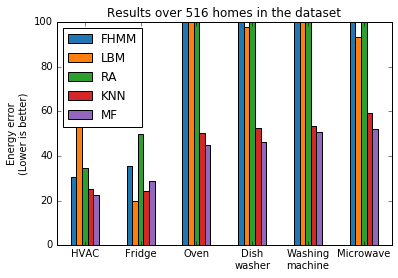

In [91]:
results_df.plot(kind='bar',rot=0, colors=tableau20blind[::2])
import matplotlib.pyplot as plt
plt.ylabel("Energy error\n(Lower is better)");
plt.title("Results over 516 homes in the dataset")
plt.savefig("../results/overall.pdf")
plt.savefig("../results/overall.png")

In [99]:
pd.set_option('precision',1)

In [100]:
results_df

,FHMM,LBM,RA,KNN,MF
HVAC,30.4,63.4,34.6,25.2,22.6
Fridge,35.7,19.6,49.7,24.1,28.8
Oven,3063.8,235.5,NaN,50.4,45.0
Dish\nwasher,1381.6,98.0,137.6,52.7,46.1
Washing\nmachine,944.4,2616.2,168.9,53.5,50.5
Microwave,822.2,93.4,NaN,59.3,52.0


In [80]:
out_overall['Austin']

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,md_available,full_agg_available,ratio_min_max,difference_ratio_min_max,variance,skew,kurtosis,p_25,p_50,p_75
22,1.5e+02,1.1e+02,6.9e+01,8.2e+01,1.1e+02,135.3,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,3.6e-02,2.9e+00,1.4e+01,1.3e+02,2.4e+02,543.8,761.4,902.4,610.0,395.2,...,1,1,0.3,0.3,204787.4,7.1e-01,-0.8,704.4,868.6,1369.3
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,8.4e+02,5.9e+02,3.6e+02,2.7e+01,7.8e+01,198.0,458.0,700.4,244.3,81.1,...,1,1,0.4,0.4,180146.4,7.6e-01,-0.3,1041.1,1259.8,1719.5
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,8.1e+02,6.3e+02,3.8e+02,2.2e+02,3.2e+02,593.9,769.5,854.1,581.8,290.3,...,0,1,0.5,0.5,74286.9,1.4e-01,-1.1,960.3,1196.5,1390.4
86,4.2e-01,4.5e-01,3.2e+00,8.2e+01,1.7e+02,376.5,714.3,844.9,565.7,259.4,...,0,1,0.3,0.3,179432.4,1.7e-01,-1.0,850.5,1196.7,1497.6
93,2.9e+01,2.7e+01,4.2e+01,1.4e+02,2.7e+02,547.1,835.9,972.3,657.8,304.6,...,0,1,0.3,0.3,164263.4,8.4e-01,-0.6,485.0,713.8,1091.4
94,0.0e+00,3.5e-04,1.0e-04,5.8e+00,2.0e+01,66.6,126.1,155.0,93.0,33.4,...,1,1,0.4,0.4,11482.2,8.9e-01,0.2,294.4,348.0,388.9
101,1.6e-01,1.2e+00,1.5e+01,1.0e+02,1.9e+02,325.9,462.7,485.2,350.5,192.6,...,1,1,0.3,0.3,47735.2,5.3e-01,-1.2,325.5,476.2,700.7


,dw_1,dw_2,dw_3,dw_4,dw_5,dw_6,dw_7,dw_8,dw_9,dw_10,dw_11,dw_12
count,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0,182.0
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,0.4,0.1,0.1,1.3,0.6,0.6,0.2,0.4,0.6,0.1
25%,23.8,22.1,22.7,22.9,22.0,24.1,26.2,29.4,23.9,22.5,28.7,24.2
50%,50.5,50.1,49.3,51.5,48.1,51.7,52.8,51.6,51.7,47.4,51.2,49.0
75%,117.6,94.9,90.0,95.1,91.0,120.4,115.9,99.3,105.4,86.3,109.8,106.6
max,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
